# 实验1 实验基础

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import cv2

img_path = './source_image.jpg'

## 一、自行在网上下载一个彩色图像文件，完成OpenCV对图像的基本操作实验

### 1. 源图像和转换后的灰度图像的截图对比

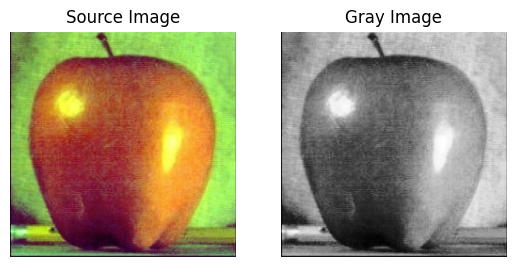

In [2]:
img = cv2.imread(img_path)

sourceImage = img
grayImage = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

with plt.ioff():
    fig, ax = plt.subplots(1, 2)

ax[0].imshow(sourceImage, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Source Image')

ax[1].imshow(grayImage, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Gray Image')

display(fig)

### 2. 源图像和灰度图在shape比较

In [3]:
print(f"source: {img_path}")

print(f"sourceImage.shape = {sourceImage.shape}")
print(f"grayImage.shape = {grayImage.shape}")

source: ./source_image.jpg
sourceImage.shape = (240, 240, 3)
grayImage.shape = (240, 240)


### 3. 将图像的高度修改为原图像的两倍（cv2.resize()），再次绘制图像

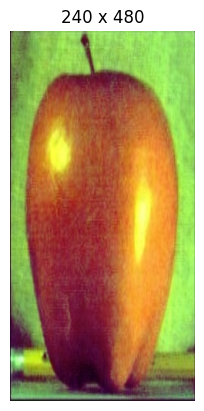

In [4]:
resizedImage = cv2.resize(sourceImage, None, fx=1.0, fy=2.0)

with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
ax.set_title(f'{resizedImage.shape[1]} x {resizedImage.shape[0]}')
ax.axis('off')

display(fig)

### 4. 使用矩阵切片绘制图像的一部分

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

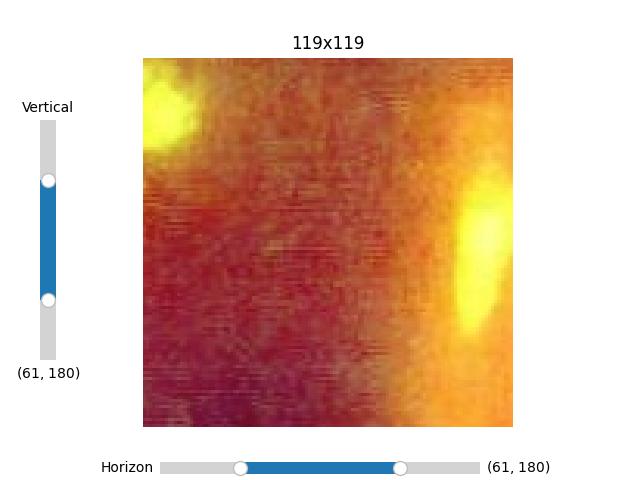

In [5]:
fig_interactive, ax_interactive = plt.subplots(1)

fig_interactive.canvas.toolbar_visible = False

x_range_slider = widgets.RangeSlider(fig_interactive.add_axes([0.25, 0.0, 0.5, 0.05]),
                                     "Horizon", 1, sourceImage.shape[1],
                                     valstep=1)

y_range_slider = widgets.RangeSlider(fig_interactive.add_axes([0.05, 0.25, 0.05, 0.5]),
                                                            "Vertical", 1, sourceImage.shape[0],
                                     orientation='vertical', valstep=1)

def update(val):
    pieces = sourceImage[y_range_slider.val[0] : y_range_slider.val[1],
                         x_range_slider.val[0] : x_range_slider.val[1]]
    ax_interactive.imshow(cv2.cvtColor(pieces, cv2.COLOR_BGR2RGB))
    ax_interactive.set_title(f'{pieces.shape[1]}x{pieces.shape[0]}')
    ax_interactive.axis('off')
    fig_interactive.canvas.draw_idle()

    return pieces

x_range_slider.on_changed(update)
y_range_slider.on_changed(update)

_ = update(None)

> 提示：重新运行下列单元格拷贝结果。

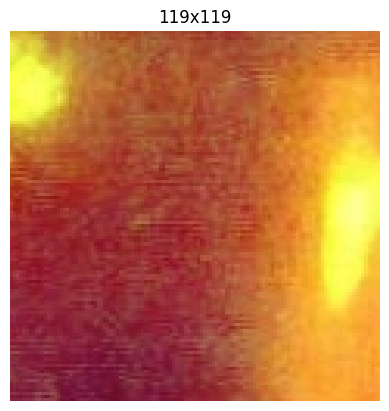

In [6]:
with plt.ioff():
    fig, ax = plt.subplots(1)

pieces = update(None)

ax.imshow(cv2.cvtColor(pieces, cv2.COLOR_BGR2RGB))
ax.set_title(f'{pieces.shape[1]}x{pieces.shape[0]}')
ax.axis('off')

display(fig)

## 二、在NoteBook中，完成matplotlib实验

### 1. 使用matplotlib读取并绘制图像

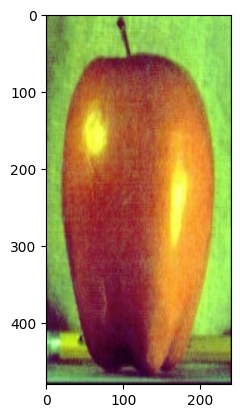

In [7]:
with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

display(fig)

### 2. 使用OpenCV读取，并用matplotlib绘制图像

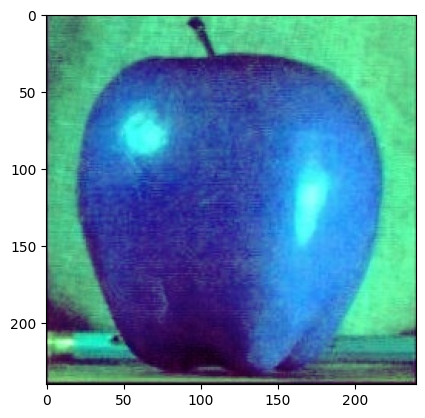

In [8]:
img = cv2.imread(img_path)

with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(img)

display(fig)

### 3. 用cv2.cvtColor(image, cv2.COLOR_BGR2RGB)转换图像颜色格式后，再次用matplotlib绘制图像

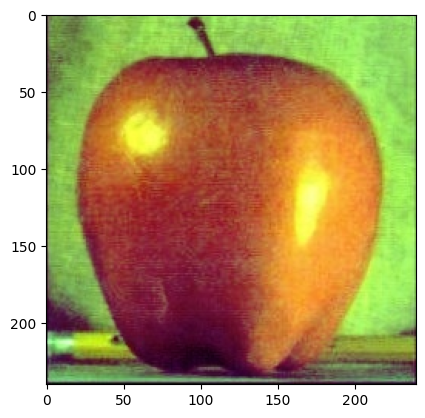

In [9]:
img = cv2.imread(img_path)
rgbImage = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(rgbImage)

display(fig)

**本地代码**（仅供参考）

1)	源图像和转换后的灰度图像的截图对比；

```
# If running local, please replace "!!PATH!!" as image path below.
# 如果要在本地运行，请将下列的"!!PATH!!"替换为图片的实际路径

import cv2

path = '!!PATH!!'

img = cv2.imread(path)

sourceImage = img.copy()
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


cv2.imshow(f'sourceImage（{path}）',sourceImage)
cv2.imshow(f'grayImage（{path}）',grayImage)

cv2.waitKey()
cv2.destroyAllWindows()
```

2)	源图像和灰度图在shape比较

```
print(f"source: {path}")

print(f"sourceImage|shape={sourceImage.shape}")
print(f"grayImage|shape={grayImage.shape}")
```
3)	将图像的高度修改为原图像的两倍（cv2.resize()），再次绘制图像

```
resizedImage = cv2.resize(sourceImage,None,fx=1.0,fy=2.0)
cv2.imshow(f'resizedImage（{path}）',resizedImage)

cv2.waitKey()
cv2.destroyAllWindows()
```

4)	使用矩阵切片绘制图像的一部分

```
piecesStartHeight = 100
piecesEndHeight = 200
piecesStartWidth = 100
piecesEndWidth = 200

pieces = sourceImage[piecesStartHeight:piecesEndHeight, piecesStartWidth:piecesEndWidth]

cv2.imshow(f'piecesImage（{path}）',pieces)

cv2.waitKey()
cv2.destroyAllWindows()
```

1)	使用matplotlib读取并绘制图像

```
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(path)

plt.imshow(img)
plt.show()
```

2)	使用OpenCV读取，并用matplotlib绘制图像

```
img = cv2.imread(path)

plt.imshow(img)
plt.show()
```

3)	用cv2.cvtColor(image, cv2.COLOR_BGR2RGB)转换图像颜色格式后，再次用matplotlib绘制图像

```
img = cv2.imread(path)

rgbImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgbImage)
plt.show()
```